In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
plt.rcParams['figure.dpi'] = 200
# See all columns
pd.set_option('display.max_columns', None)

In [2]:
def colores_jxc(df):
    colors = sns.color_palette("YlOrBr", n_colors=2*len(df.columns))
    start_index = len(df.columns)//2 + 4
    custom_palette = colors[start_index:]
    return custom_palette

def colores_lla(df):
    colors = sns.color_palette("ch:s=-.2,r=.6", n_colors=2*len(df.columns))
    start_index = len(df.columns)//2
    custom_palette = colors[start_index:]
    return custom_palette

def colores_upp(df):
    colors = sns.color_palette("Blues", n_colors=2*len(df.columns))
    start_index = len(df.columns)//2 + 4
    custom_palette = colors[start_index:]
    return custom_palette

In [2]:
# Load the data
df3 = pd.read_csv('C:/Users/Marcos/Desktop/Elecciones PASO/ResultadosElectorales.csv')
df3.head()

C:\Users\Marcos\AppData\Local\Temp\ipykernel_2180\1172614053.py:2: DtypeWarning: Columns (7,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df3 = pd.read_csv('C:/Users/Marcos/Desktop/Elecciones PASO/ResultadosElectorales.csv')


,año,eleccion_tipo,recuento_tipo,padron_tipo,distrito_id,distrito_nombre,seccionprovincial_id,seccionprovincial_nombre,seccion_id,seccion_nombre,circuito_id,circuito_nombre,mesa_id,mesa_tipo,mesa_electores,cargo_id,cargo_nombre,agrupacion_id,agrupacion_nombre,lista_numero,lista_nombre,votos_tipo,votos_cantidad
0,2023,PASO,PROVISORIO,NORMAL,2,Buenos Aires,3,Sección Tercera,62,Lanús,00265,00265,513,NATIVOS,351,1,PRESIDENTE/A,20,UNION DEL CENTRO DEMOCRATICO,3018,A- APERTURA LIBERAL ARGENTINA,POSITIVO,0
1,2023,PASO,PROVISORIO,NORMAL,2,Buenos Aires,3,Sección Tercera,62,Lanús,00265,00265,513,NATIVOS,351,1,PRESIDENTE/A,0,NaN,0,NaN,EN BLANCO,13
2,2023,PASO,PROVISORIO,NORMAL,2,Buenos Aires,3,Sección Tercera,62,Lanús,00265,00265,513,NATIVOS,351,1,PRESIDENTE/A,0,NaN,0,NaN,NULO,2
3,2023,PASO,PROVISORIO,NORMAL,2,Buenos Aires,3,Sección Tercera,62,Lanús,00265,00265,513,NATIVOS,351,1,PRESIDENTE/A,0,NaN,0,NaN,IMPUGNADO,0
4,2023,PASO,PROVISORIO,NORMAL,2,Buenos Aires,3,Sección Tercera,62,Lanús,00265,00265,513,NATIVOS,351,1,PRESIDENTE/A,0,NaN,0,NaN,RECURRIDO,0


In [4]:
df3 = df3[df3['cargo_nombre'] == 'PRESIDENTE/A']
# df_presidente = df3[df3['cargo_nombre'] == 'PRESIDENTE/A']
# df_presidente['id_mesa'] = df_presidente['distrito_nombre'].astype(str)+'-'+df_presidente['seccion_nombre'].astype(str)+'-'+df_presidente['circuito_id'].astype(str)+'-'+df_presidente['mesa_id'].astype(str)
# In the oficial webpage of the government it says that the total number of "mesas" were 104520, so let's check we have the same number
# len(df_presidente['id_mesa'].unique())
# df_presidente
# df3

In [4]:
df_csv = df_presidente[['id_mesa','agrupacion_nombre','votos_tipo','votos_cantidad']]
df_csv = df_csv.sort_values(['id_mesa'])
df_csv['agrupacion_nombre'].unique()
df_csv = df_csv.groupby(['id_mesa','agrupacion_nombre'])['votos_cantidad'].sum().reset_index()
filter_values = ['HACEMOS POR NUESTRO PAIS','UNION POR LA PATRIA','FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD','JUNTOS POR EL CAMBIO','LA LIBERTAD AVANZA']
mask =df_csv['agrupacion_nombre'].isin(filter_values)
df_filtered = df_csv[mask]
df_filtered['agrupacion_nombre'] = df_filtered['agrupacion_nombre'].replace(['FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD'], 'FRENTE DE IZQUIERDA')
df_filtered.head(10)
df_filtered.to_csv('votos_cantidad_mesas_paso.csv', index=False)


C:\Users\Marcos\AppData\Local\Temp\ipykernel_14732\903241754.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['agrupacion_nombre'] = df_filtered['agrupacion_nombre'].replace(['FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD'], 'FRENTE DE IZQUIERDA')


<hr>

# Analisis Por Provincia

In [14]:
df3 = df3[df3['cargo_nombre']=='PRESIDENTE/A']
asdd = df3[df3['distrito_nombre']=='Tucumán']

In [15]:
asdd['votos_cantidad'].sum()

965553

In [ ]:
1079405-965553

In [13]:
asddd = asdd.groupby('agrupacion_nombre')['votos_cantidad'].sum().reset_index().sort_values(['votos_cantidad'], ascending=False)
asddd
# asddd[~asddd['agrupacion_nombre'].isin(['UNION POR LA PATRIA','LA LIBERTAD AVANZA','JUNTOS POR EL CAMBIO','HACEMOS POR NUESTRO PAIS','FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD'])].sum()

,agrupacion_nombre,votos_cantidad
5,LA LIBERTAD AVANZA,342681
14,UNION POR LA PATRIA,313085
4,JUNTOS POR EL CAMBIO,206969
0,FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD,16029
9,MOVIMIENTO LIBRES DEL SUR,15445
3,HACEMOS POR NUESTRO PAIS,11302
10,POLITICA OBRERA,3349
8,MOVIMIENTO IZQUIERDA JUVENTUD Y DIGNIDAD,3205
6,MOVIMIENTO AL SOCIALISMO,2971
2,FRENTE PATRIOTA FEDERAL,2889


In [12]:
asdd.groupby('votos_tipo')['votos_cantidad'].sum().reset_index()

,votos_tipo,votos_cantidad
0,COMANDO,736
1,EN BLANCO,30624
2,IMPUGNADO,86
3,NULO,10962
4,POSITIVO,922589
5,RECURRIDO,556


In [ ]:
aaa = df3[df3['distrito_nombre']=='Formosa']
aaa = aaa[aaa['votos_cantidad']<='Formosa']

---

<hr>

In [5]:
print(df1['cargo_nombre'].unique())
print(df1.shape)

['PRESIDENTE/A' 'DIPUTADOS/AS NACIONALES' 'PARLAMENTO MERCOSUR REGIONAL'
 'SENADORES/AS PROVINCIALES' 'DIPUTADOS/AS PROVINCIALES'
 'SENADORES/AS NACIONALES' 'GOBERNADOR/A' 'PARLAMENTO MERCOSUR NACIONAL'
 'INTENDENTE/A' 'CONCEJAL']
(16600877, 23)


In [4]:
df1 = df1[df1['cargo_nombre']=='PRESIDENTE/A']
df1.shape

(3114677, 23)

In [13]:
df1.head()

,año,eleccion_tipo,recuento_tipo,padron_tipo,distrito_id,distrito_nombre,seccionprovincial_id,seccionprovincial_nombre,seccion_id,seccion_nombre,circuito_id,circuito_nombre,mesa_id,mesa_tipo,mesa_electores,cargo_id,cargo_nombre,agrupacion_id,agrupacion_nombre,lista_numero,lista_nombre,votos_tipo,votos_cantidad,id_mesa
0,2023,PASO,PROVISORIO,NORMAL,2,Buenos Aires,3,Sección Tercera,62,Lanús,00265,00265,513,NATIVOS,351,1,PRESIDENTE/A,20,UNION DEL CENTRO DEMOCRATICO,3018,A- APERTURA LIBERAL ARGENTINA,POSITIVO,0,Buenos Aires/Lanús/00265/513
1,2023,PASO,PROVISORIO,NORMAL,2,Buenos Aires,3,Sección Tercera,62,Lanús,00265,00265,513,NATIVOS,351,1,PRESIDENTE/A,0,NaN,0,NaN,EN BLANCO,13,Buenos Aires/Lanús/00265/513
2,2023,PASO,PROVISORIO,NORMAL,2,Buenos Aires,3,Sección Tercera,62,Lanús,00265,00265,513,NATIVOS,351,1,PRESIDENTE/A,0,NaN,0,NaN,NULO,2,Buenos Aires/Lanús/00265/513
3,2023,PASO,PROVISORIO,NORMAL,2,Buenos Aires,3,Sección Tercera,62,Lanús,00265,00265,513,NATIVOS,351,1,PRESIDENTE/A,0,NaN,0,NaN,IMPUGNADO,0,Buenos Aires/Lanús/00265/513
4,2023,PASO,PROVISORIO,NORMAL,2,Buenos Aires,3,Sección Tercera,62,Lanús,00265,00265,513,NATIVOS,351,1,PRESIDENTE/A,0,NaN,0,NaN,RECURRIDO,0,Buenos Aires/Lanús/00265/513


In [19]:
asd = df1[(df1['distrito_nombre']=='Ciudad Autónoma de Buenos Aires') & (df1['seccion_nombre']=='Comuna 01')]
asd = df1[(df1['circuito_id']=='00001') & (df1['mesa_id']==1)]
asd

,año,eleccion_tipo,recuento_tipo,padron_tipo,distrito_id,distrito_nombre,seccionprovincial_id,seccionprovincial_nombre,seccion_id,seccion_nombre,circuito_id,circuito_nombre,mesa_id,mesa_tipo,mesa_electores,cargo_id,cargo_nombre,agrupacion_id,agrupacion_nombre,lista_numero,lista_nombre,votos_tipo,votos_cantidad,id_mesa
252,2023,PASO,PROVISORIO,NORMAL,1,Ciudad Autónoma de Buenos Aires,0,NaN,1,Comuna 01,00001,00001,1,NATIVOS,344,1,PRESIDENTE/A,137,PRINCIPIOS Y VALORES,3011,"1A- TIERRA, TECHO Y TRABAJO",POSITIVO,3,Ciudad Autónoma de Buenos Aires/Comuna 01/00001/1
253,2023,PASO,PROVISORIO,NORMAL,1,Ciudad Autónoma de Buenos Aires,0,NaN,1,Comuna 01,00001,00001,1,NATIVOS,344,1,PRESIDENTE/A,133,HACEMOS POR NUESTRO PAIS,3001,A- HACEMOS,POSITIVO,3,Ciudad Autónoma de Buenos Aires/Comuna 01/00001/1
254,2023,PASO,PROVISORIO,NORMAL,1,Ciudad Autónoma de Buenos Aires,0,NaN,1,Comuna 01,00001,00001,1,NATIVOS,344,1,PRESIDENTE/A,134,UNION POR LA PATRIA,3005,A- CELESTE Y BLANCA,POSITIVO,49,Ciudad Autónoma de Buenos Aires/Comuna 01/00001/1
255,2023,PASO,PROVISORIO,NORMAL,1,Ciudad Autónoma de Buenos Aires,0,NaN,1,Comuna 01,00001,00001,1,NATIVOS,344,1,PRESIDENTE/A,134,UNION POR LA PATRIA,3006,B- JUSTA Y SOBERANA,POSITIVO,25,Ciudad Autónoma de Buenos Aires/Comuna 01/00001/1
256,2023,PASO,PROVISORIO,NORMAL,1,Ciudad Autónoma de Buenos Aires,0,NaN,1,Comuna 01,00001,00001,1,NATIVOS,344,1,PRESIDENTE/A,131,FRENTE LIBER.AR,3002,A- DEMOS,POSITIVO,0,Ciudad Autónoma de Buenos Aires/Comuna 01/00001/1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211809,2023,PASO,PROVISORIO,NORMAL,23,Tucumán,1,Capital,1,Capital,00001,00001,1,NATIVOS,336,1,PRESIDENTE/A,0,NaN,0,NaN,EN BLANCO,1,Tucumán/Capital/00001/1
3211810,2023,PASO,PROVISORIO,NORMAL,23,Tucumán,1,Capital,1,Capital,00001,00001,1,NATIVOS,336,1,PRESIDENTE/A,0,NaN,0,NaN,NULO,1,Tucumán/Capital/00001/1
3211811,2023,PASO,PROVISORIO,NORMAL,23,Tucumán,1,Capital,1,Capital,00001,00001,1,NATIVOS,336,1,PRESIDENTE/A,0,NaN,0,NaN,IMPUGNADO,0,Tucumán/Capital/00001/1
3211812,2023,PASO,PROVISORIO,NORMAL,23,Tucumán,1,Capital,1,Capital,00001,00001,1,NATIVOS,336,1,PRESIDENTE/A,0,NaN,0,NaN,RECURRIDO,0,Tucumán/Capital/00001/1


In [6]:
df1 = df3.copy()

In [7]:
df1['id_mesa'] = df1['distrito_nombre'].astype(str)+'/'+df1['seccion_nombre'].astype(str)+'/'+df1['circuito_id'].astype(str)+'/'+df1['mesa_id'].astype(str)
df_depurated_1 = df1.drop(['año',
                          'eleccion_tipo',
                          'recuento_tipo',
                          'padron_tipo',
                          'seccionprovincial_nombre',
                          'seccion_nombre',
                          'mesa_tipo',
                          'circuito_nombre',
                          'seccionprovincial_id',
                          'circuito_id',
                          'mesa_id',
                          'seccion_id',
                          'cargo_id',
                          'lista_numero',
                          # 'lista_nombre',
                          'cargo_nombre',
                          ],
                         axis = 1) # .head(10)

df_depurated_2 = df_depurated_1[['distrito_nombre','distrito_id','id_mesa','mesa_electores','agrupacion_nombre','lista_nombre','agrupacion_id','votos_tipo','votos_cantidad']]
df_depurated_2 = df_depurated_2.sort_values(['distrito_id','id_mesa']).reset_index(drop=True)
df_depurated_2['agrupacion_nombre'] = df_depurated_2['agrupacion_nombre'].replace(['FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD'], 'FRENTE DE IZQUIERDA')
df_depurated_2.head(5)

,distrito_nombre,distrito_id,id_mesa,mesa_electores,agrupacion_nombre,lista_nombre,agrupacion_id,votos_tipo,votos_cantidad
0,Ciudad Autónoma de Buenos Aires,1,Ciudad Autónoma de Buenos Aires/Comuna 01/00001/1,344,PRINCIPIOS Y VALORES,"1A- TIERRA, TECHO Y TRABAJO",137,POSITIVO,3
1,Ciudad Autónoma de Buenos Aires,1,Ciudad Autónoma de Buenos Aires/Comuna 01/00001/1,344,HACEMOS POR NUESTRO PAIS,A- HACEMOS,133,POSITIVO,3
2,Ciudad Autónoma de Buenos Aires,1,Ciudad Autónoma de Buenos Aires/Comuna 01/00001/1,344,UNION POR LA PATRIA,A- CELESTE Y BLANCA,134,POSITIVO,49
3,Ciudad Autónoma de Buenos Aires,1,Ciudad Autónoma de Buenos Aires/Comuna 01/00001/1,344,UNION POR LA PATRIA,B- JUSTA Y SOBERANA,134,POSITIVO,25
4,Ciudad Autónoma de Buenos Aires,1,Ciudad Autónoma de Buenos Aires/Comuna 01/00001/1,344,FRENTE LIBER.AR,A- DEMOS,131,POSITIVO,0


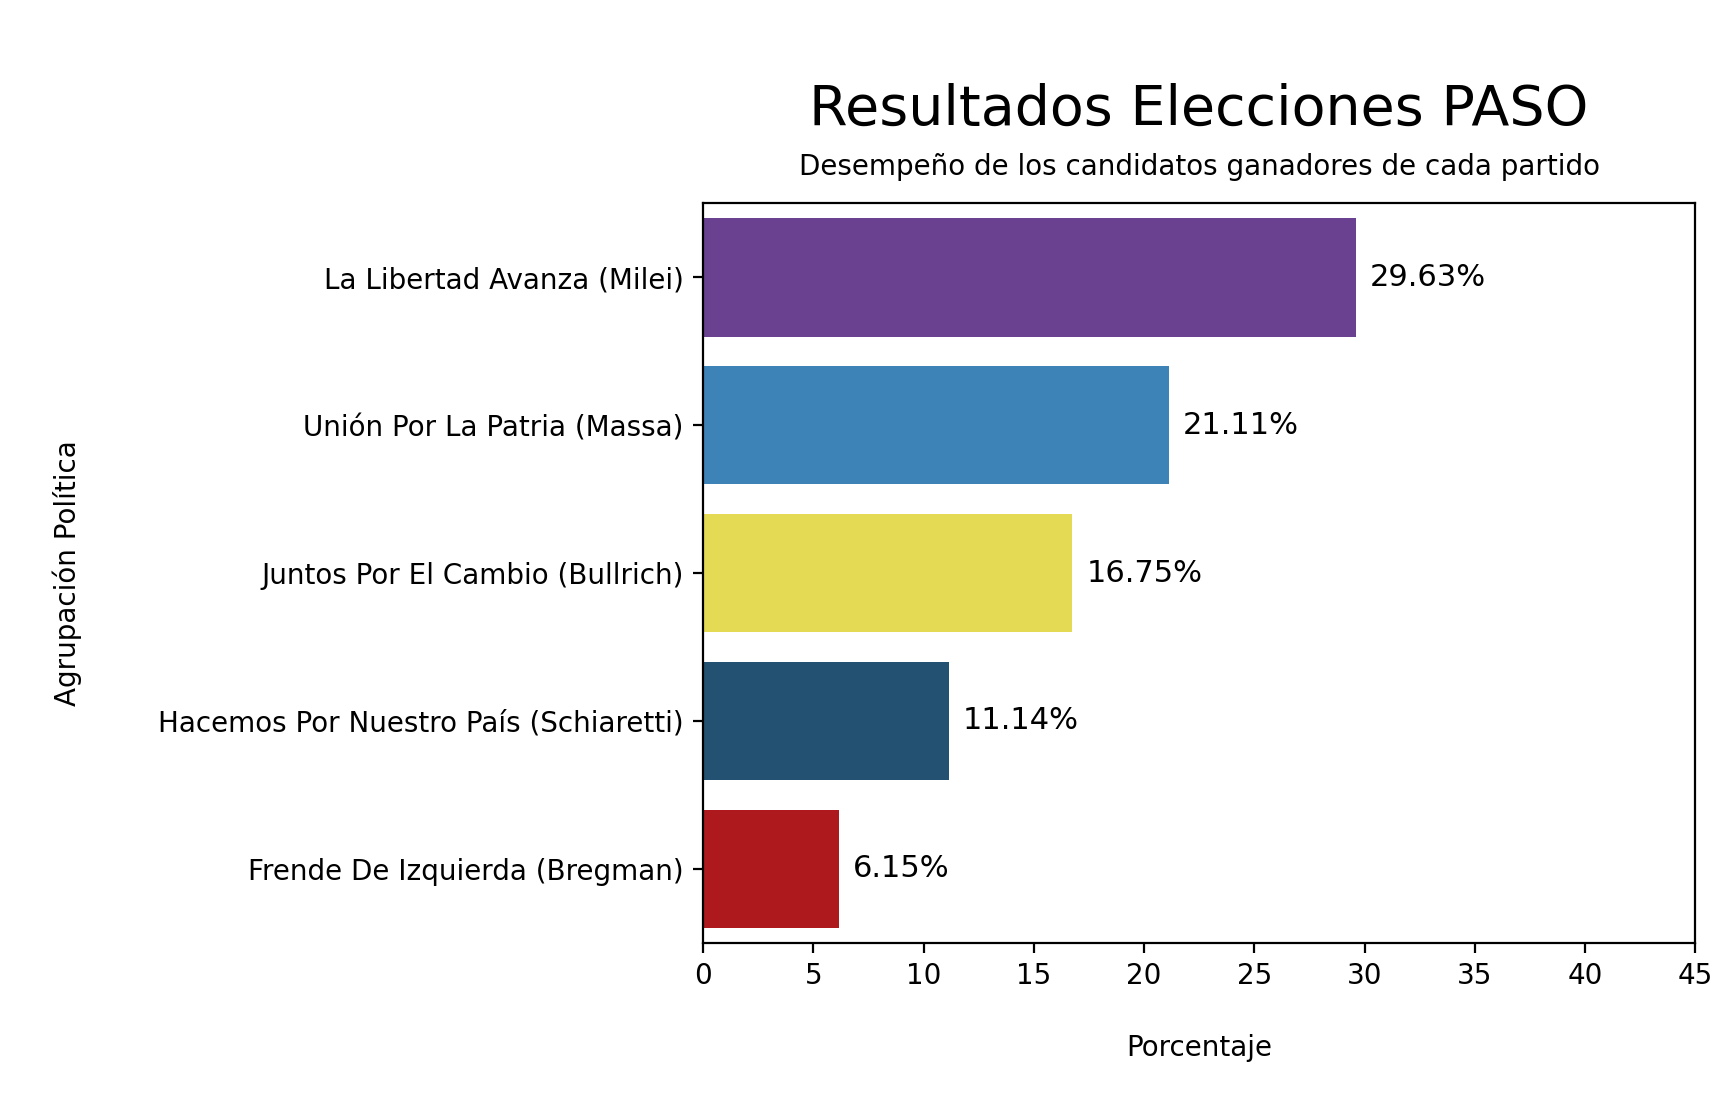

In [158]:
custom_palette = sns.color_palette(['#6A329F', '#2986CC', '#FCEE3C', '#16537e', '#C60004'])
result_df = df_depurated_2.copy()
result_df['agrupacion_nombre2'] = result_df['agrupacion_nombre'].astype(str)+' / '+ result_df['lista_nombre'].astype(str)
result_df = result_df.groupby('agrupacion_nombre2')['votos_cantidad'].sum().reset_index()
total_votes = df_depurated_2['votos_cantidad'].sum()
total_votes
result_df['votos_cantidad'] = round(result_df['votos_cantidad'].div(total_votes/100, axis=0),2)
result_df = result_df.sort_values('votos_cantidad', ascending=False)
result_df = result_df.head().reset_index(drop=True)#.drop([3,4,5,8])
result_df
chart = sns.barplot(data = result_df.head(), x = 'votos_cantidad', y = 'agrupacion_nombre2', palette=custom_palette)
for container in chart.containers:
    chart.bar_label(container, fontsize=11, padding=5, labels=[f'{float(val):.2f}%' for val in container.datavalues])
plt.title('\nResultados Elecciones PASO\n', fontsize=20)
plt.text(0.5, 1.05, 'Desempeño de los candidatos ganadores de cada partido', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
plt.xlabel('\nPorcentaje\n')
plt.ylabel('\nAgrupación Política\n\n')
plt.xlim(0,45)

custom_x_labels = ['La Libertad Avanza (Milei)',
                   'Unión Por La Patria (Massa)',
                   'Juntos Por El Cambio (Bullrich)',
                   'Hacemos Por Nuestro País (Schiaretti)',
                   'Frende De Izquierda (Bregman)']
chart.set_yticklabels(custom_x_labels)

plt.savefig('Imagenes/Resultados_Elecciones_PASO_Candidato.png', bbox_inches='tight')
plt.show()

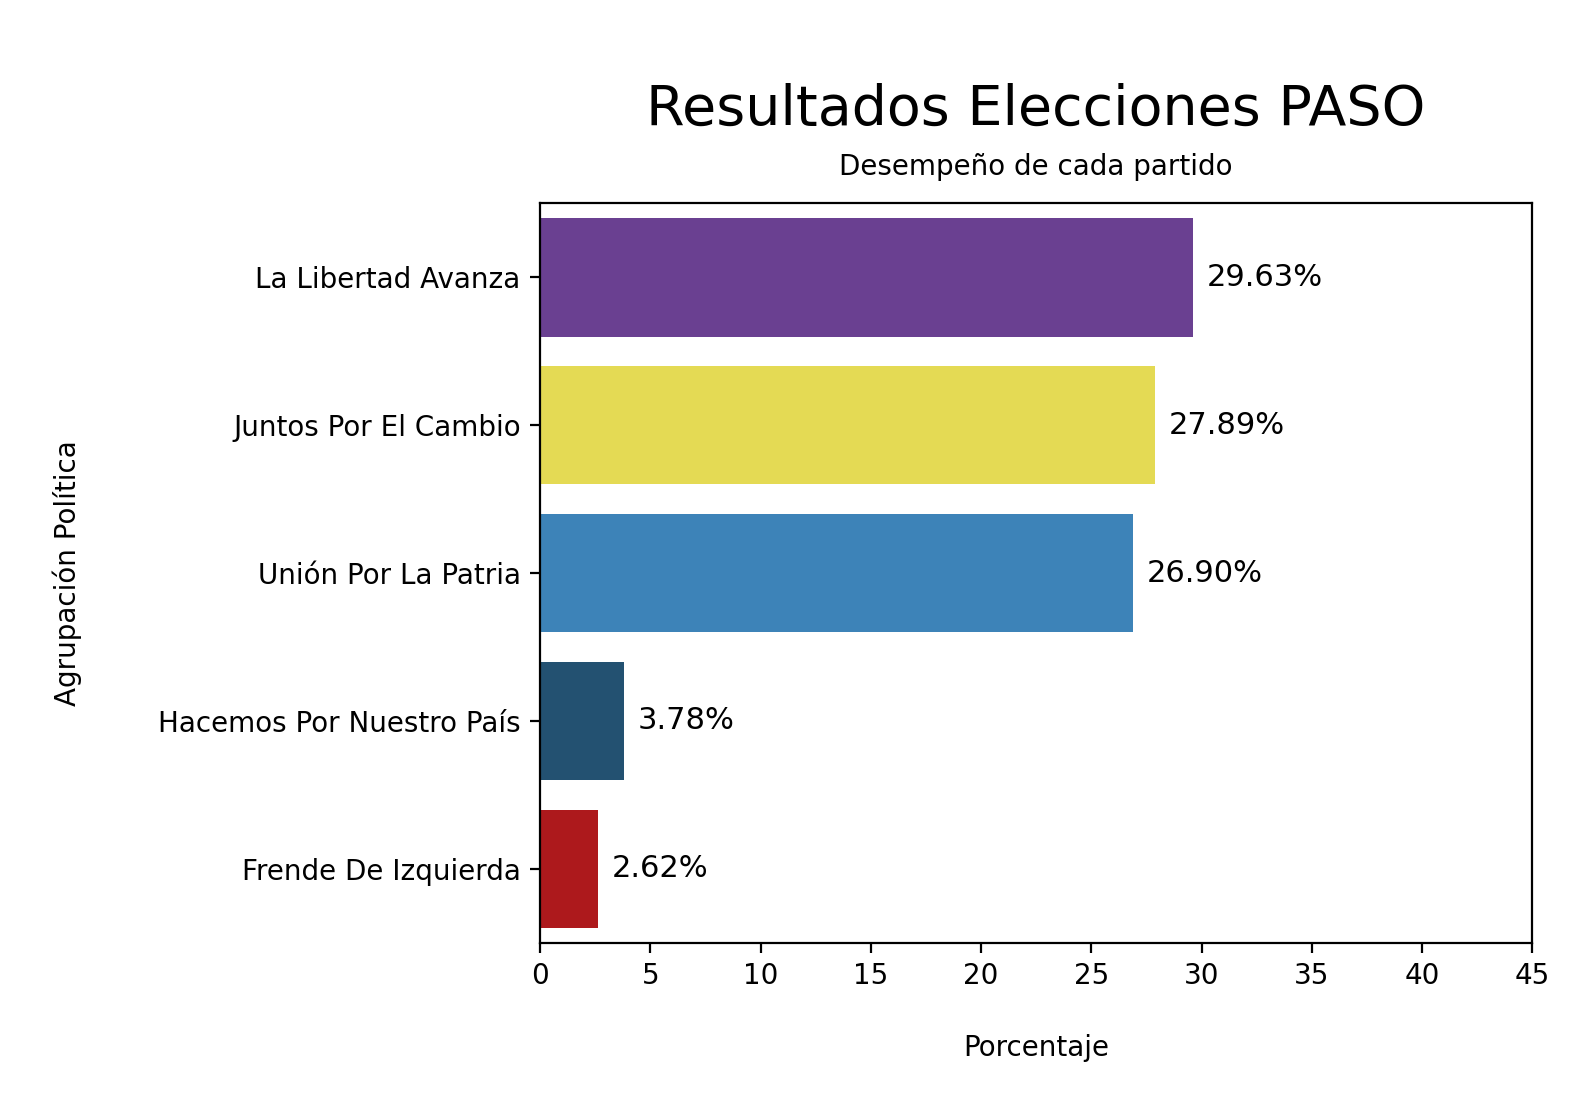

In [159]:
custom_palette = sns.color_palette(['#6A329F', '#FCEE3C', '#2986CC', '#16537e', '#C60004'])
result_df = df_depurated_2.copy()
# result_df['agrupacion_nombre2'] = result_df['agrupacion_nombre'].astype(str)+' / '+ result_df['lista_nombre'].astype(str)
result_df = result_df.groupby('agrupacion_nombre')['votos_cantidad'].sum().reset_index()
total_votes = df_depurated_2['votos_cantidad'].sum()
total_votes
result_df['votos_cantidad'] = round(result_df['votos_cantidad'].div(total_votes/100, axis=0),2)
result_df
result_df = result_df.sort_values('votos_cantidad', ascending=False)
result_df = result_df.head(9).reset_index(drop=True)
chart = sns.barplot(data = result_df.head(), x = 'votos_cantidad', y = 'agrupacion_nombre', palette=custom_palette)
for container in chart.containers:
    chart.bar_label(container, fontsize=11, padding=5, labels=[f'{float(val):.2f}%' for val in container.datavalues])
plt.title('\nResultados Elecciones PASO\n', fontsize=20)
plt.text(0.5, 1.05, 'Desempeño de cada partido', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
plt.xlabel('\nPorcentaje\n')
plt.ylabel('\nAgrupación Política\n\n')
plt.xlim(0,45)

custom_x_labels = ['La Libertad Avanza',
                   'Juntos Por El Cambio',
                   'Unión Por La Patria',
                   'Hacemos Por Nuestro País',
                   'Frende De Izquierda']
chart.set_yticklabels(custom_x_labels)

plt.savefig('Imagenes/Resultados_Elecciones_PASO.png', bbox_inches='tight')
plt.show()

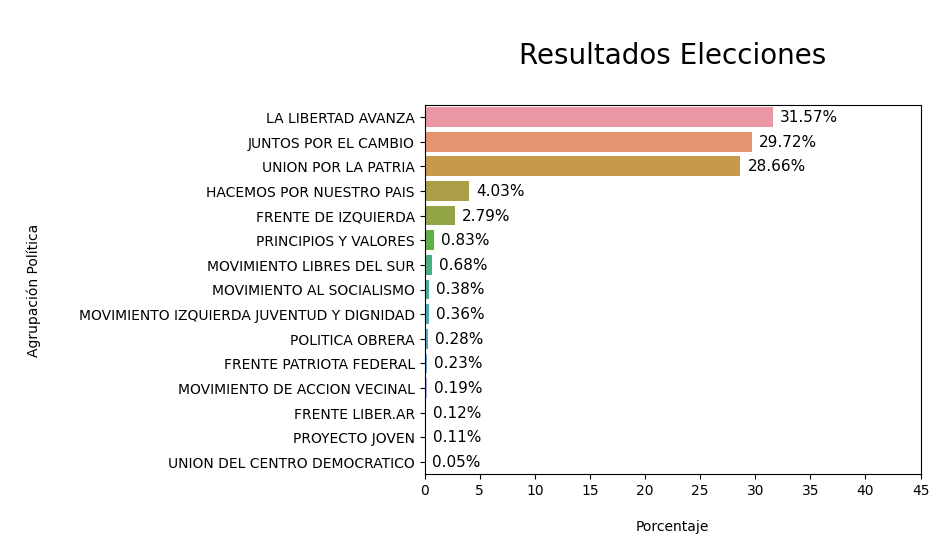

In [24]:
# df_depurated_2_1 = df_depurated_2[~(df_depurated_2['lista_nombre']=='B- JUSTA Y SOBERANA')]
# custom_palette = sns.color_palette(['#2986CC', '#6A329F', '#FCEE3C', '#16537e', '#C60004'])
result_df = df_depurated_2.groupby('agrupacion_nombre')['votos_cantidad'].sum().reset_index()
total_votes = result_df['votos_cantidad'].sum()
result_df['votos_cantidad'] = round(result_df['votos_cantidad'].div(total_votes/100, axis=0),2)
result_df = result_df.sort_values('votos_cantidad', ascending=False)

chart = sns.barplot(data = result_df, x = 'votos_cantidad', y = 'agrupacion_nombre')
for container in chart.containers:
    chart.bar_label(container, fontsize=11, padding=5, labels=[f'{float(val):.2f}%' for val in container.datavalues])
plt.title('\nResultados Elecciones\n', fontsize=20)
plt.xlabel('\nPorcentaje\n')
plt.ylabel('\nAgrupación Política\n\n')
plt.xlim(0,45)
# plt.savefig('Imagenes/Resultados_Elecciones.png', bbox_inches='tight')
plt.show()

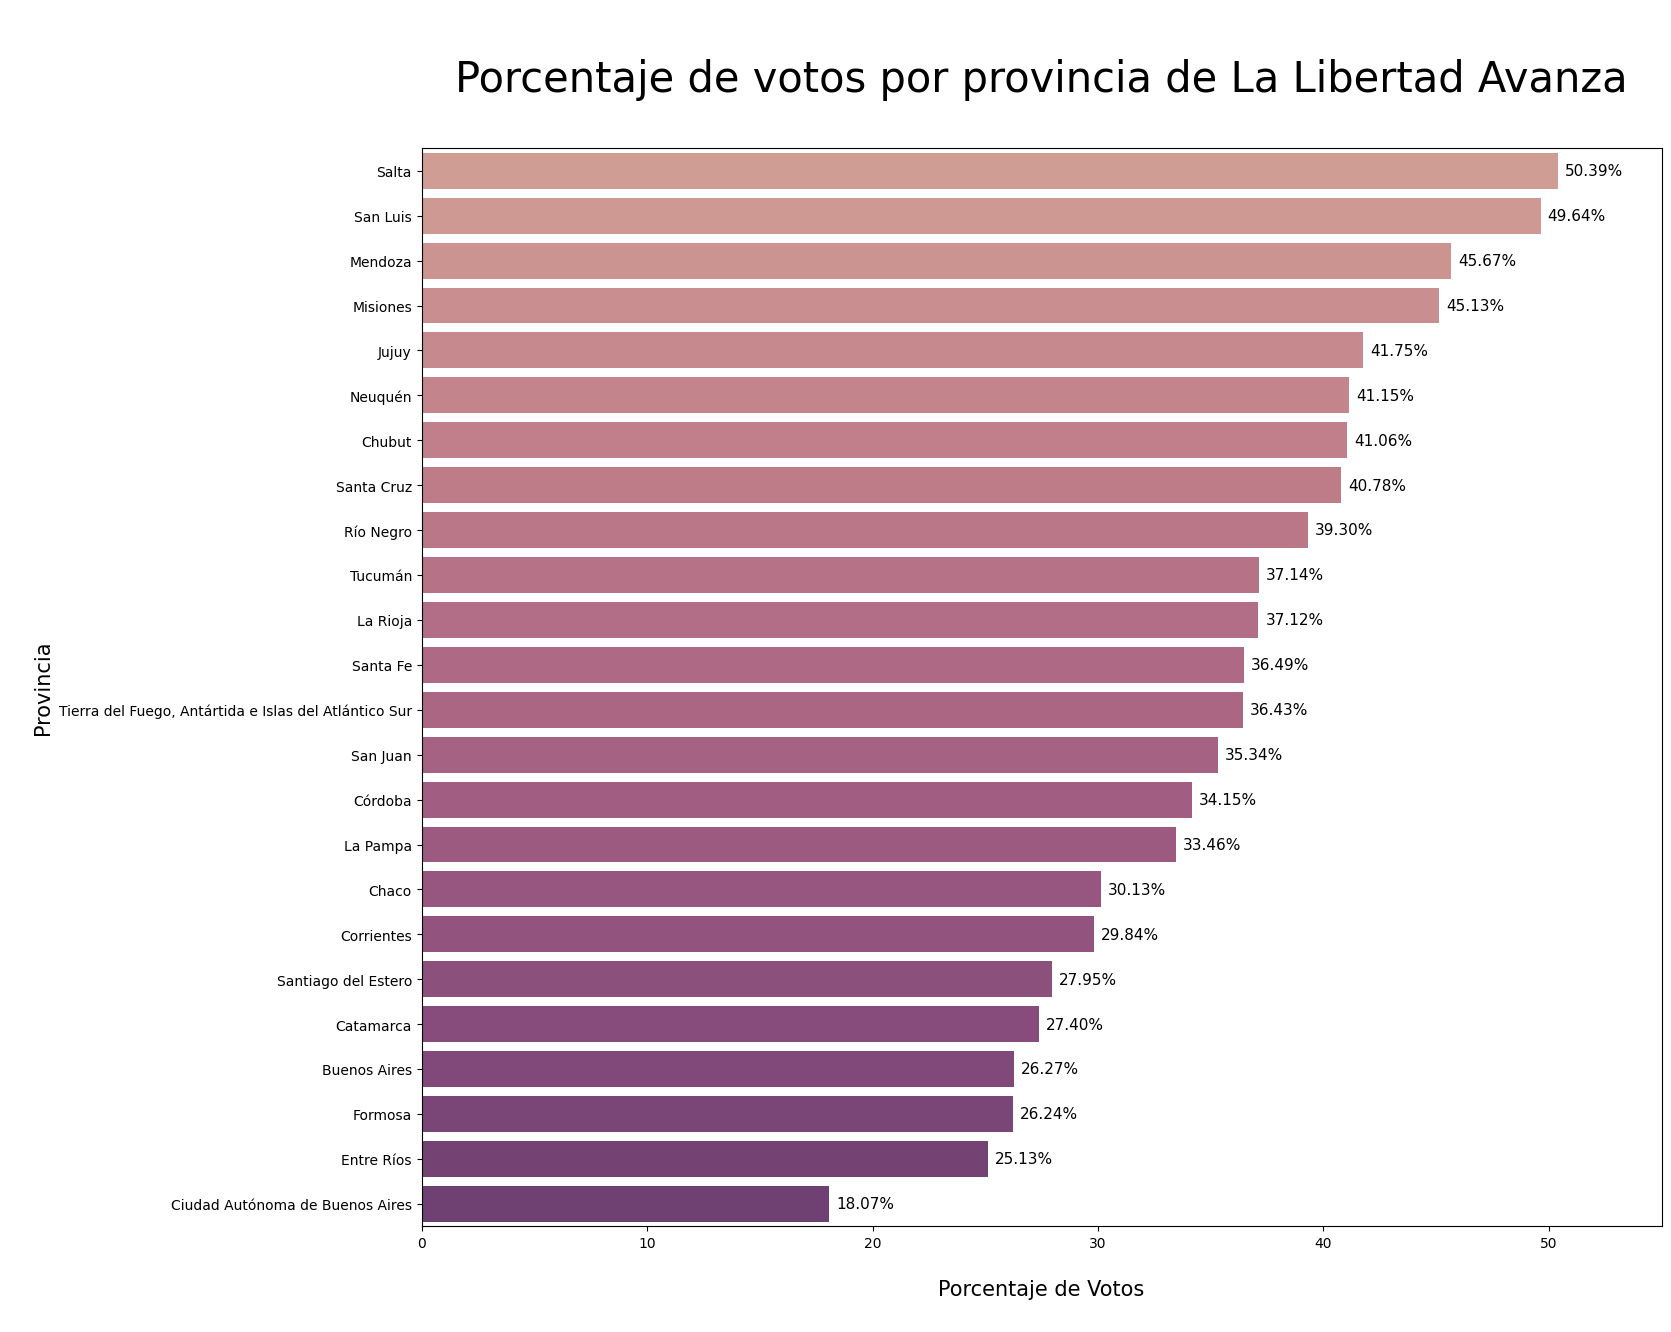

In [28]:
pd.options.display.float_format = '{:.2f}'.format

result_df_all_states = df_depurated_2[['distrito_nombre','distrito_id','agrupacion_nombre','votos_cantidad']]
result_df_all_states = round(result_df_all_states.groupby(['distrito_nombre','agrupacion_nombre'])['votos_cantidad'].sum().unstack(fill_value=0),3)

total_votes = result_df_all_states.sum(axis=1).reset_index().sort_values(0, ascending=True)
index = total_votes.iloc[:,0].tolist()
result_df_all_states = result_df_all_states.loc[index]
result_df_all_states_index = result_df_all_states.reset_index().index.tolist()
for distrito in result_df_all_states_index:
    result_df_all_states.iloc[distrito,:] = round(result_df_all_states.iloc[distrito,:].div(result_df_all_states.iloc[distrito,:].sum(axis=0),axis=0),4)*100
result_df_all_states = result_df_all_states['LA LIBERTAD AVANZA'].reset_index().set_index('distrito_nombre').sort_values('LA LIBERTAD AVANZA',ascending=False)
index = result_df_all_states.index.tolist()
result_df_all_states = result_df_all_states.T

colors = sns.color_palette("ch:s=-.2,r=.6", n_colors=2*len(result_df_all_states.columns))
start_index = len(result_df_all_states.columns)//2
custom_palette = colors[start_index:]

plt.figure(figsize=(16, 14))
chart = sns.barplot(data=result_df_all_states, orient='h', palette=custom_palette, saturation=1)

for container in chart.containers:
    chart.bar_label(container, fontsize=11, padding=5, labels=[f'{float(val):.2f}%' for val in container.datavalues])

chart.set_title('\nPorcentaje de votos por provincia de La Libertad Avanza\n', fontsize=30)
chart.set_xlabel('\nPorcentaje de Votos\n', fontsize=15)
chart.set_ylabel('\nProvincia', fontsize=15)
chart.set_xlim(0, 55)

# plt.savefig('Imagenes/Porcentajes_Provincia_LLA.png', bbox_inches='tight')
plt.show()

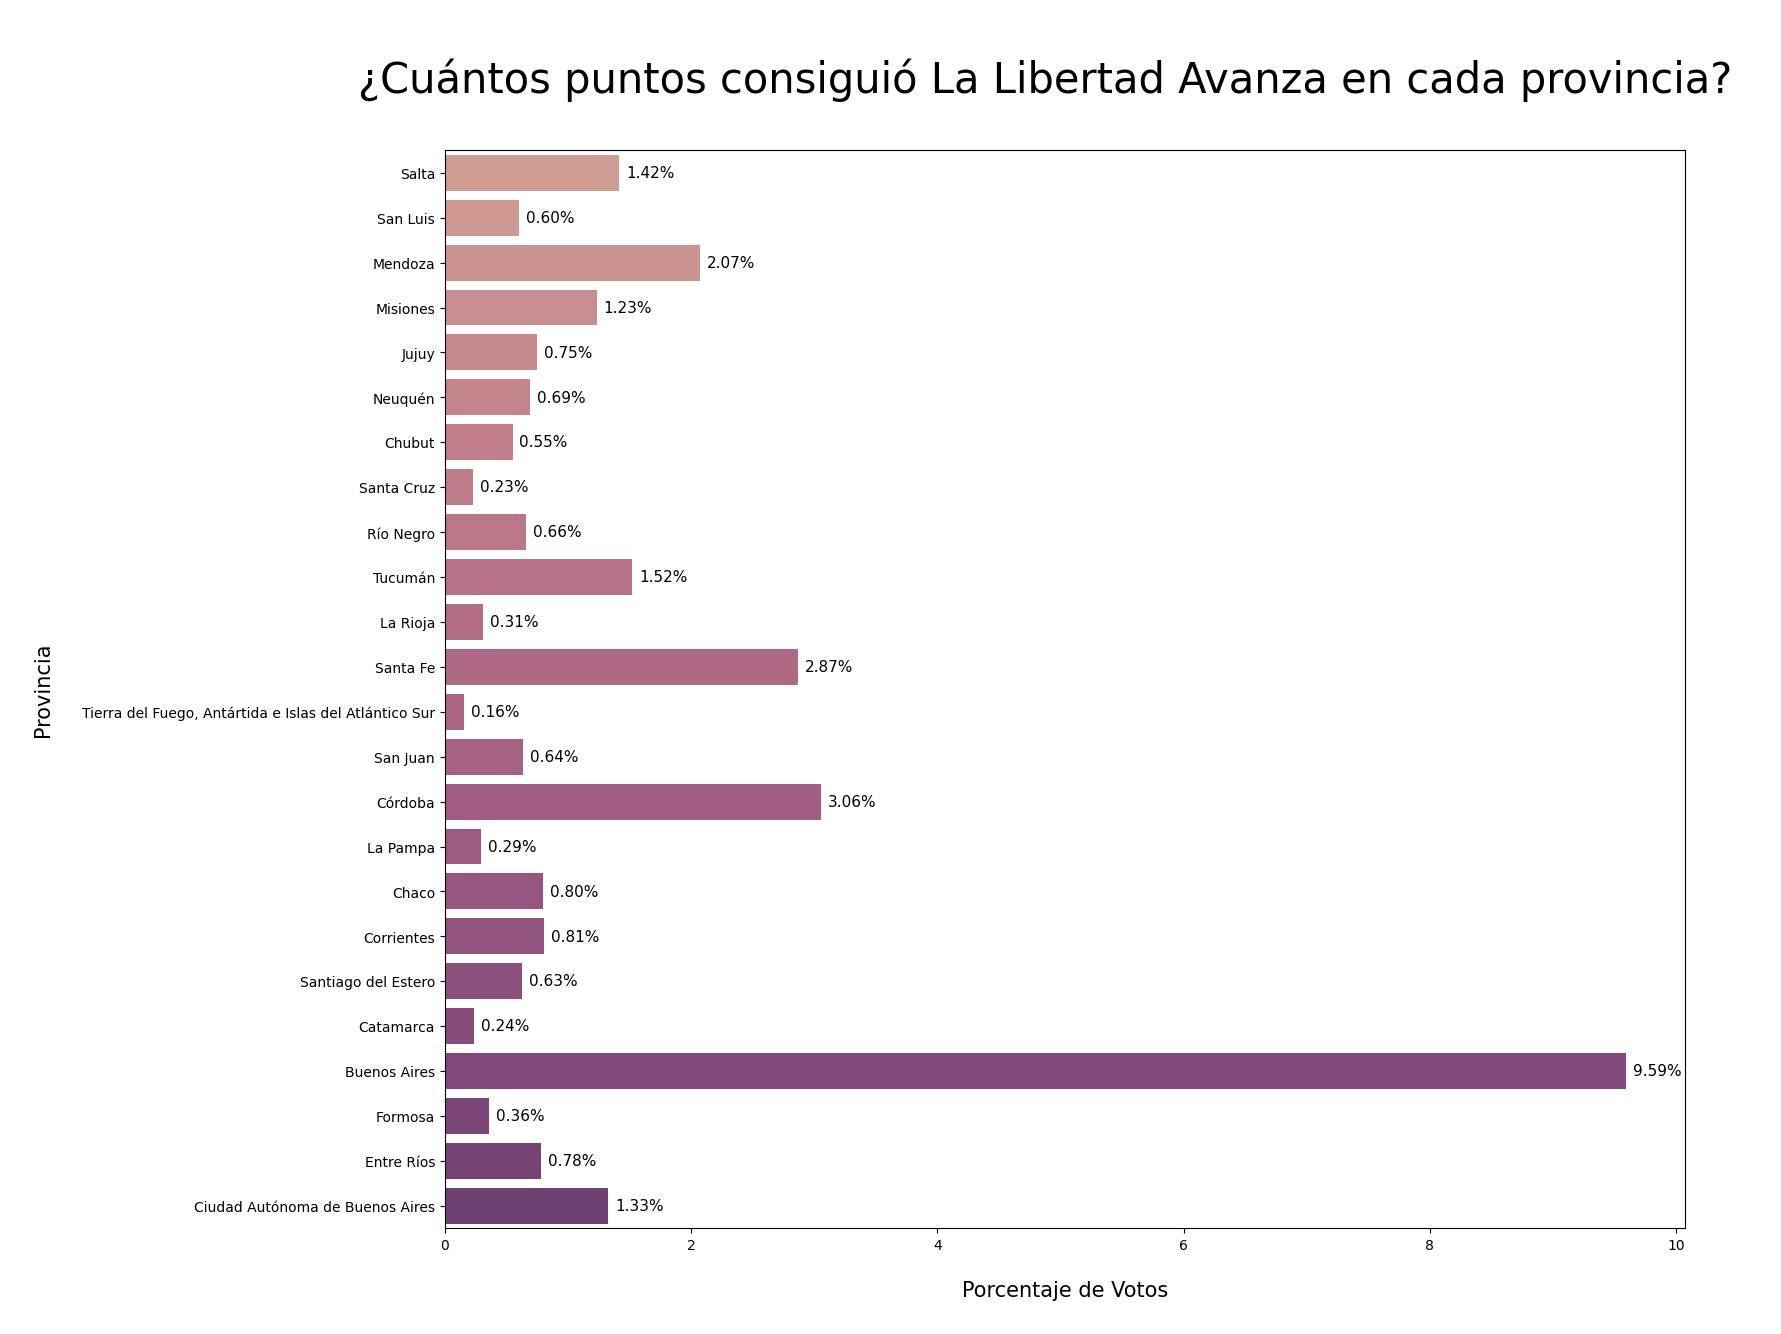

In [31]:
# INDEX SPECIFIED IN PREVIOUS CELL
result_df_all_states = df_depurated_2[['distrito_nombre','distrito_id','agrupacion_nombre','votos_cantidad']]
result_df_all_states = round(result_df_all_states.groupby(['distrito_nombre','agrupacion_nombre'])['votos_cantidad'].sum().unstack(fill_value=0),3)#.div(1000000,axis=0)

result_df_all_states_milei = result_df_all_states['LA LIBERTAD AVANZA']

result_df_all_states_milei = result_df_all_states_milei.reset_index().set_index('distrito_nombre')#.sort_values('LA LIBERTAD AVANZA',ascending=False)
result_df_all_states_milei = round(result_df_all_states_milei.div(result_df_all_states.sum().sum())*100,3)
result_df_all_states_milei = result_df_all_states_milei.loc[index]
result_df_all_states_milei2 = result_df_all_states_milei.T#.reset_index()

custom_palette = colores_lla(result_df_all_states_milei2)

plt.figure(figsize=(16, 14))
chart = sns.barplot(data=result_df_all_states_milei2, orient='h', palette=custom_palette, saturation=1, order=index)

for container in chart.containers:
    chart.bar_label(container, fontsize=11, padding=5, labels=[f'{float(val):.2f}%' for val in container.datavalues])

chart.set_title('\n¿Cuántos puntos consiguió La Libertad Avanza en cada provincia?   \n', fontsize=30)
chart.set_xlabel('\nPorcentaje de Votos\n', fontsize=15)
chart.set_ylabel('\nProvincia\n', fontsize=15)

# plt.savefig('Imagenes/Porcentajes_Provincia_LLA_Fragmentado.png', bbox_inches='tight')
plt.show()

In [8]:
# Pass votos_cantidad to percentage in each mesa

df1_mesa = df_depurated_2.copy()
df1_mesa['votos_porcentaje'] = round(df1_mesa.groupby('id_mesa')['votos_cantidad'].transform(lambda x: x / x.sum() * 100),2)
df1_mesa.head()

,distrito_nombre,distrito_id,id_mesa,mesa_electores,agrupacion_nombre,lista_nombre,agrupacion_id,votos_tipo,votos_cantidad,votos_porcentaje
0,Ciudad Autónoma de Buenos Aires,1,Ciudad Autónoma de Buenos Aires/Comuna 01/00001/1,344,PRINCIPIOS Y VALORES,"1A- TIERRA, TECHO Y TRABAJO",137,POSITIVO,3,1.36
1,Ciudad Autónoma de Buenos Aires,1,Ciudad Autónoma de Buenos Aires/Comuna 01/00001/1,344,HACEMOS POR NUESTRO PAIS,A- HACEMOS,133,POSITIVO,3,1.36
2,Ciudad Autónoma de Buenos Aires,1,Ciudad Autónoma de Buenos Aires/Comuna 01/00001/1,344,UNION POR LA PATRIA,A- CELESTE Y BLANCA,134,POSITIVO,49,22.27
3,Ciudad Autónoma de Buenos Aires,1,Ciudad Autónoma de Buenos Aires/Comuna 01/00001/1,344,UNION POR LA PATRIA,B- JUSTA Y SOBERANA,134,POSITIVO,25,11.36
4,Ciudad Autónoma de Buenos Aires,1,Ciudad Autónoma de Buenos Aires/Comuna 01/00001/1,344,FRENTE LIBER.AR,A- DEMOS,131,POSITIVO,0,0.00


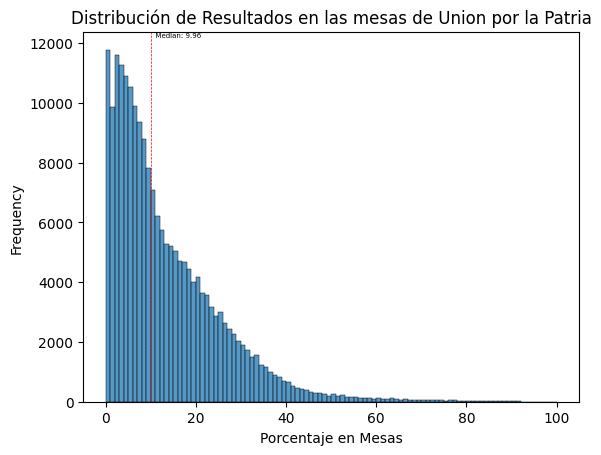

In [46]:
df1_mesas_porcen = df1_mesa[df1_mesa['agrupacion_nombre']=='UNION POR LA PATRIA']
promedio = df1_mesas_porcen['votos_porcentaje'].mean()
mediana = df1_mesas_porcen['votos_porcentaje'].median()

data_range = df1_mesas_porcen['votos_porcentaje'].max() - df1_mesas_porcen['votos_porcentaje'].min()
num_bins = int(np.ceil(data_range / 1))

chart = sns.histplot(df1_mesas_porcen, x="votos_porcentaje", bins=num_bins)
# chart.set(xlim=(0, 100))


plt.axvline(mediana, color='red', linestyle='--',linewidth=0.5)
plt.text(mediana,chart.get_ylim()[1], f'  Median: {mediana:.2f}', color='black', fontsize=5, verticalalignment='top')
plt.title('Distribución de Resultados en las mesas de Union por la Patria')
plt.xlabel('Porcentaje en Mesas')
plt.ylabel('Frequency')

plt.savefig('Imagenes/Distribución_de_Resultados_en_las_mesas_de_Union_por_la_Patria.png')
plt.show()

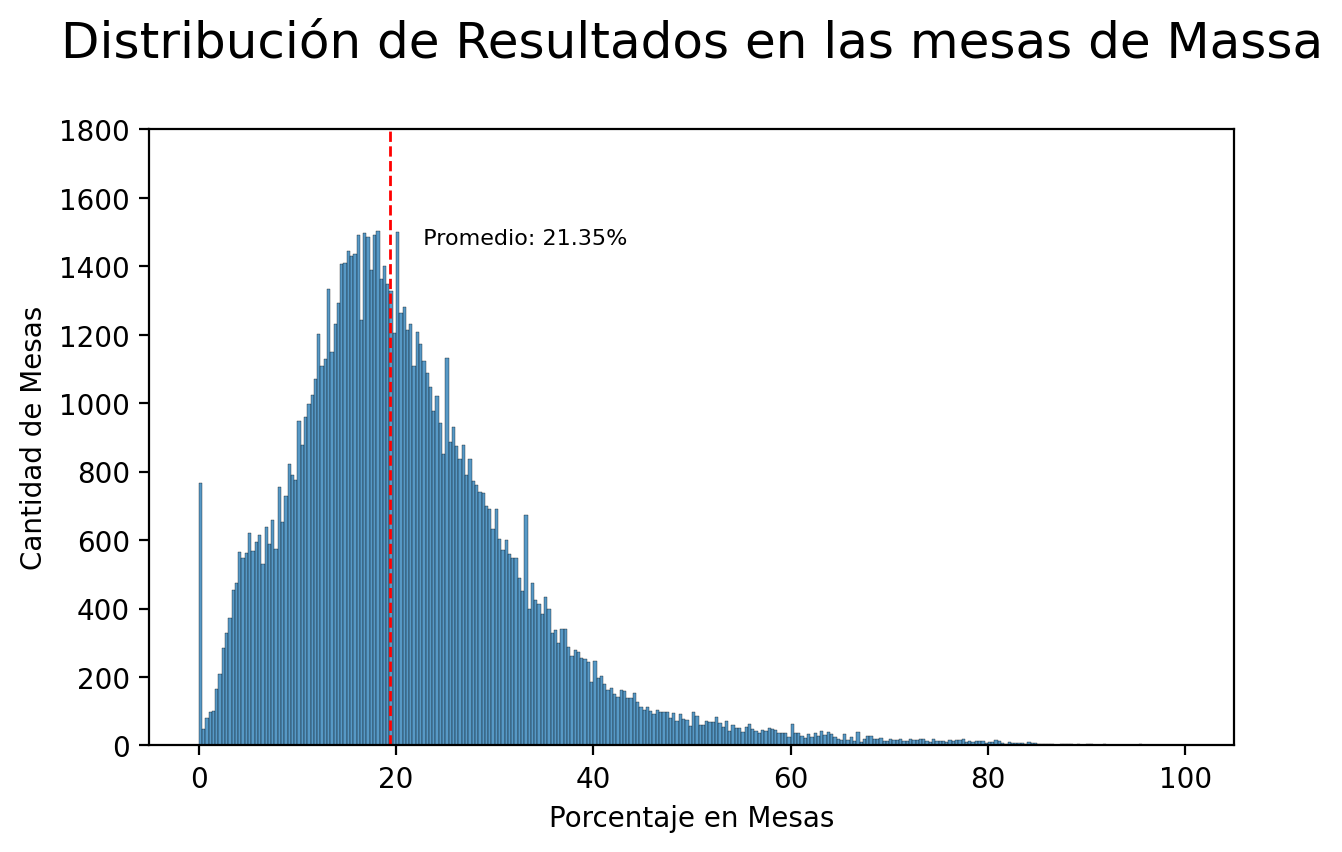

In [20]:
import numpy as np
plt.rcParams['figure.dpi'] = 200
# df1_mesas_porcen = df1_mesa[df1_mesa['agrupacion_nombre']=='UNION POR LA PATRIA']
df1_mesas_porcen = df1_mesa[df1_mesa['lista_nombre'] == 'A- CELESTE Y BLANCA']
# df1_mesas_porcen = df1_mesas_porcen[df1_mesas_porcen['distrito_nombre']=='Santiago del Estero']
promedio = df1_mesas_porcen['votos_porcentaje'].mean()
mediana = df1_mesas_porcen['votos_porcentaje'].median()

data_range = df1_mesas_porcen['votos_porcentaje'].max() - df1_mesas_porcen['votos_porcentaje'].min()
num_bins = int(np.ceil(data_range / 1))
plt.figure(figsize=(7, 4))
chart = sns.histplot(df1_mesas_porcen, x="votos_porcentaje", bins=num_bins*3)
plt.text(promedio,chart.get_ylim()[1], f'\n  Promedio: {promedio:.2f}%', color='black', fontsize=8, verticalalignment='top')
plt.axvline(mediana, color='red', linestyle='--',linewidth=1)
chart.set_ylim(0,1800)

plt.title('Distribución de Resultados en las mesas de Massa\n', fontsize=18)
plt.xlabel('Porcentaje en Mesas')
plt.ylabel('Cantidad de Mesas')

plt.savefig('Imagenes/Distribucion_Massa_PASO.png', bbox_inches='tight')
plt.show()

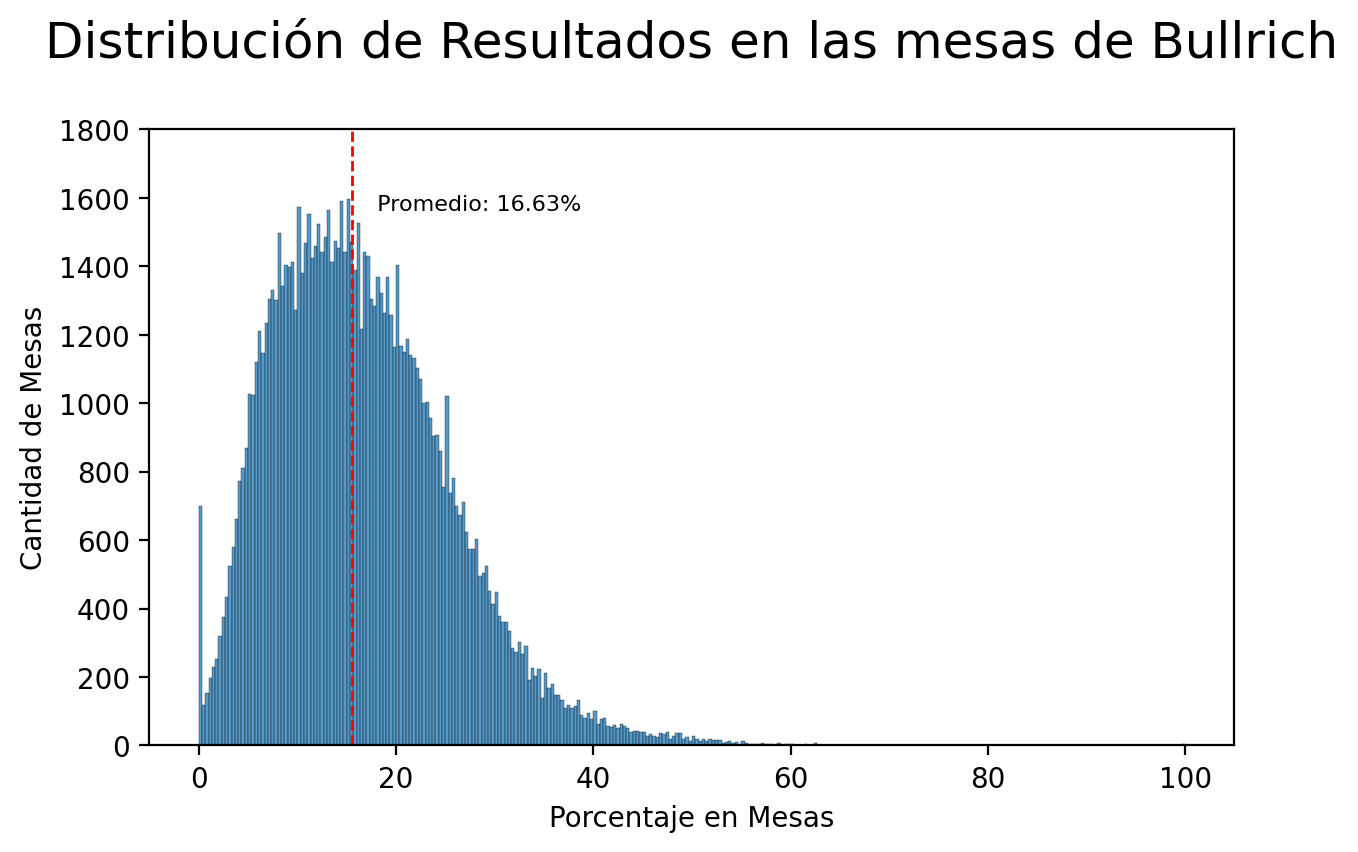

In [21]:
import numpy as np
plt.rcParams['figure.dpi'] = 200
# df1_mesas_porcen = df1_mesa[df1_mesa['agrupacion_nombre']=='UNION POR LA PATRIA']
df1_mesas_porcen = df1_mesa[df1_mesa['lista_nombre'] == 'B- LA FUERZA DEL CAMBIO']
# df1_mesas_porcen = df1_mesas_porcen[df1_mesas_porcen['distrito_nombre']=='Santiago del Estero']
promedio = df1_mesas_porcen['votos_porcentaje'].mean()
mediana = df1_mesas_porcen['votos_porcentaje'].median()

data_range = df1_mesas_porcen['votos_porcentaje'].max() - df1_mesas_porcen['votos_porcentaje'].min()
num_bins = int(np.ceil(data_range / 1))
plt.figure(figsize=(7, 4))
chart = sns.histplot(df1_mesas_porcen, x="votos_porcentaje", bins=num_bins*3)
plt.text(promedio,chart.get_ylim()[1], f'\n  Promedio: {promedio:.2f}%', color='black', fontsize=8, verticalalignment='top')
plt.axvline(mediana, color='red', linestyle='--',linewidth=1)
chart.set_ylim(0,1800)

plt.title('Distribución de Resultados en las mesas de Bullrich\n', fontsize=18)
plt.xlabel('Porcentaje en Mesas')
plt.ylabel('Cantidad de Mesas')

plt.savefig('Imagenes/Distribucion_BULLRICH_PASO.png', bbox_inches='tight')
plt.show()

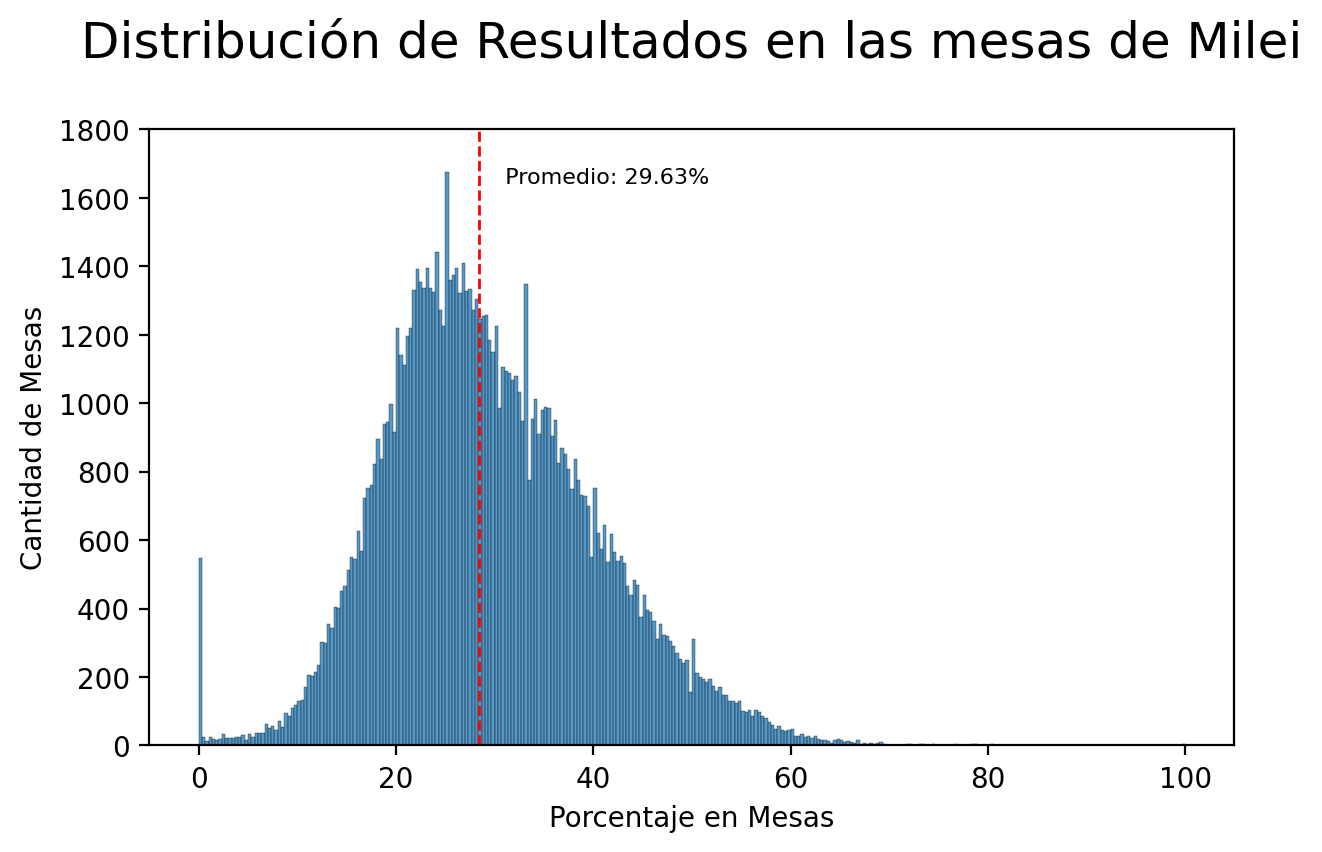

In [22]:
import numpy as np
plt.rcParams['figure.dpi'] = 200
df1_mesas_porcen = df1_mesa[df1_mesa['agrupacion_nombre']=='LA LIBERTAD AVANZA']
# df1_mesas_porcen = df1_mesa[df1_mesa['lista_nombre'] == 'B- LA FUERZA DEL CAMBIO']
# df1_mesas_porcen = df1_mesas_porcen[df1_mesas_porcen['distrito_nombre']=='Santiago del Estero']
promedio = df1_mesas_porcen['votos_porcentaje'].mean()
mediana = df1_mesas_porcen['votos_porcentaje'].median()

data_range = df1_mesas_porcen['votos_porcentaje'].max() - df1_mesas_porcen['votos_porcentaje'].min()
num_bins = int(np.ceil(data_range / 1))
plt.figure(figsize=(7, 4))
chart = sns.histplot(df1_mesas_porcen, x="votos_porcentaje", bins=num_bins*3)
plt.text(promedio,chart.get_ylim()[1], f'\n  Promedio: {promedio:.2f}%', color='black', fontsize=8, verticalalignment='top')
plt.axvline(mediana, color='red', linestyle='--',linewidth=1)
chart.set_ylim(0,1800)

plt.title('Distribución de Resultados en las mesas de Milei\n', fontsize=18)
plt.xlabel('Porcentaje en Mesas')
plt.ylabel('Cantidad de Mesas')

plt.savefig('Imagenes/Distribucion_MILEI_PASO.png', bbox_inches='tight')
plt.show()

In [20]:
import numpy as np
plt.rcParams['figure.dpi'] = 200
df1_mesas_porcen = df1_mesa[df1_mesa['lista_nombre']=='B- LA FUERZA DEL CAMBIO']
df1_mesas_porcen
# promedio = df1_mesas_porcen['votos_porcentaje'].mean()
# mediana = df1_mesas_porcen['votos_porcentaje'].median()

# data_range = df1_mesas_porcen['votos_porcentaje'].max() - df1_mesas_porcen['votos_porcentaje'].min()
# num_bins = int(np.ceil(data_range / 1))
# plt.figure(figsize=(7, 4))
# chart = sns.histplot(df1_mesas_porcen, x="votos_porcentaje", bins=num_bins*3)
# plt.text(promedio,chart.get_ylim()[1], f'\n  Promedio: {promedio:.2f}%', color='black', fontsize=8, verticalalignment='top')
# plt.axvline(mediana, color='red', linestyle='--',linewidth=1)
# # chart.set_ylim(0,1800)

# plt.title('Distribución de Resultados en las mesas de JxC\n', fontsize=18)
# plt.xlabel('Porcentaje en Mesas')
# plt.ylabel('Cantidad de Mesas')

# # plt.savefig('Imagenes/Distribucion_LLA_mesas.png', bbox_inches='tight')
# plt.show()

,distrito_nombre,distrito_id,id_mesa,mesa_electores,agrupacion_nombre,lista_nombre,agrupacion_id,votos_tipo,votos_cantidad,votos_porcentaje
12,Ciudad Autónoma de Buenos Aires,1,Ciudad Autónoma de Buenos Aires/Comuna 01/00001/1,344,JUNTOS POR EL CAMBIO,B- LA FUERZA DEL CAMBIO,132,POSITIVO,44,5.00
29,Ciudad Autónoma de Buenos Aires,1,Ciudad Autónoma de Buenos Aires/Comuna 01/00001/1,344,JUNTOS POR EL CAMBIO,B- LA FUERZA DEL CAMBIO,132,POSITIVO,40,4.55
62,Ciudad Autónoma de Buenos Aires,1,Ciudad Autónoma de Buenos Aires/Comuna 01/00001/1,344,JUNTOS POR EL CAMBIO,B- LA FUERZA DEL CAMBIO,132,POSITIVO,41,4.66
97,Ciudad Autónoma de Buenos Aires,1,Ciudad Autónoma de Buenos Aires/Comuna 01/00001/1,344,JUNTOS POR EL CAMBIO,B- LA FUERZA DEL CAMBIO,132,POSITIVO,40,4.55
102,Ciudad Autónoma de Buenos Aires,1,Ciudad Autónoma de Buenos Aires/Comuna 01/0000...,344,JUNTOS POR EL CAMBIO,B- LA FUERZA DEL CAMBIO,132,POSITIVO,49,6.39
...,...,...,...,...,...,...,...,...,...,...
16600688,"Tierra del Fuego, Antártida e Islas del Atlánt...",24,"Tierra del Fuego, Antártida e Islas del Atlánt...",295,JUNTOS POR EL CAMBIO,B- LA FUERZA DEL CAMBIO,132,POSITIVO,21,2.55
16600724,"Tierra del Fuego, Antártida e Islas del Atlánt...",24,"Tierra del Fuego, Antártida e Islas del Atlánt...",301,JUNTOS POR EL CAMBIO,B- LA FUERZA DEL CAMBIO,132,POSITIVO,24,2.94
16600775,"Tierra del Fuego, Antártida e Islas del Atlánt...",24,"Tierra del Fuego, Antártida e Islas del Atlánt...",301,JUNTOS POR EL CAMBIO,B- LA FUERZA DEL CAMBIO,132,POSITIVO,24,2.94
16600818,"Tierra del Fuego, Antártida e Islas del Atlánt...",24,"Tierra del Fuego, Antártida e Islas del Atlánt...",270,JUNTOS POR EL CAMBIO,B- LA FUERZA DEL CAMBIO,132,POSITIVO,18,3.36


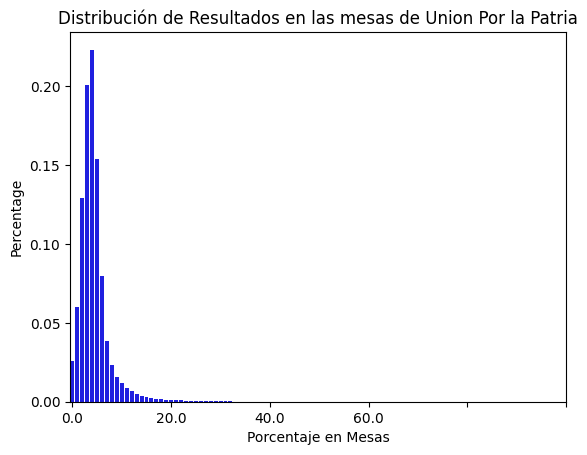

In [14]:
plt.rcParams['figure.dpi'] = 100
df1_mesas_porcen = df1_mesa[df1_mesa['lista_nombre'] == 'A- CELESTE Y BLANCA']
df1_mesas_porcen_2 = df1_mesas_porcen[['votos_porcentaje']]
df1_mesas_porcen_3 = df1_mesas_porcen_2.value_counts().reset_index()
df1_mesas_porcen_3.rename(columns = {0:'Frequency'}, inplace = True)
df1_mesas_porcen_3 = df1_mesas_porcen_3.value_counts().reset_index()
df1_mesas_porcen_3['votos_porcentaje'] = round(df1_mesas_porcen_3['votos_porcentaje'],0)
df1_mesas_porcen_3 = df1_mesas_porcen_3.groupby('votos_porcentaje')['Frequency'].sum().reset_index()
df1_mesas_porcen_3 = df1_mesas_porcen_3.sort_values(['votos_porcentaje'])
total = df1_mesas_porcen_3['Frequency'].sum()
df1_mesas_porcen_3['Frequency'] = df1_mesas_porcen_3['Frequency']/total
promedio = df1_mesas_porcen['votos_porcentaje'].mean()
mediana = df1_mesas_porcen['votos_porcentaje'].median()

data_range = df1_mesas_porcen_3['votos_porcentaje'].max() - df1_mesas_porcen_3['votos_porcentaje'].min()
num_bins = int(np.ceil(data_range / 1))
# plt.bar(df1_mesas_porcen_3["votos_porcentaje"], df1_mesas_porcen_3["Frequency"], width=0.9)
chart = sns.barplot(data=df1_mesas_porcen_3, x="votos_porcentaje", y="Frequency", color="blue")
plt.title('Distribución de Resultados en las mesas de Union Por la Patria')
plt.xlabel('Porcentaje en Mesas')
plt.ylabel('Percentage')
custom_xticks = [0,20, 40, 60, 80, 100]
plt.xticks(ticks=custom_xticks)
# mediana = df1_mesas_porcen_3[''].median()
# plt.text(mediana,chart.get_ylim()[1], f'  Median: {mediana:.2f}', color='black', fontsize=5, verticalalignment='top')
# plt.axvline(mediana, color='red', linestyle='--',linewidth=0.5)
plt.show()

In [ ]:
df1_mesas_porcen = df1_mesa[df1_mesa['agrupacion_nombre']=='UNION POR LA PATRIA']
promedio = df1_mesas_porcen['votos_porcentaje'].mean()
mediana = df1_mesas_porcen['votos_porcentaje'].median()
chart = sns.displot(df1_mesas_porcen, x="votos_porcentaje", bins=100)
chart.set(xlim=(0, 100))

plt.axvline(mediana, color='red', linestyle='--',linewidth=0.5)
plt.text(mediana,chart.ax.get_ylim()[1], f'  Median: {mediana:.2f}', color='black', fontsize=5, verticalalignment='top')
plt.title('Distribución de Resultados en las mesas de Union por la Patria')
plt.xlabel('Porcentaje en Mesas')
plt.ylabel('Frequency')

# plt.savefig('Imagenes/Distribución_de_Resultados_en_las_mesas_de_Union_por_la_Patria.png')
plt.show()

In [49]:
from scipy import stats

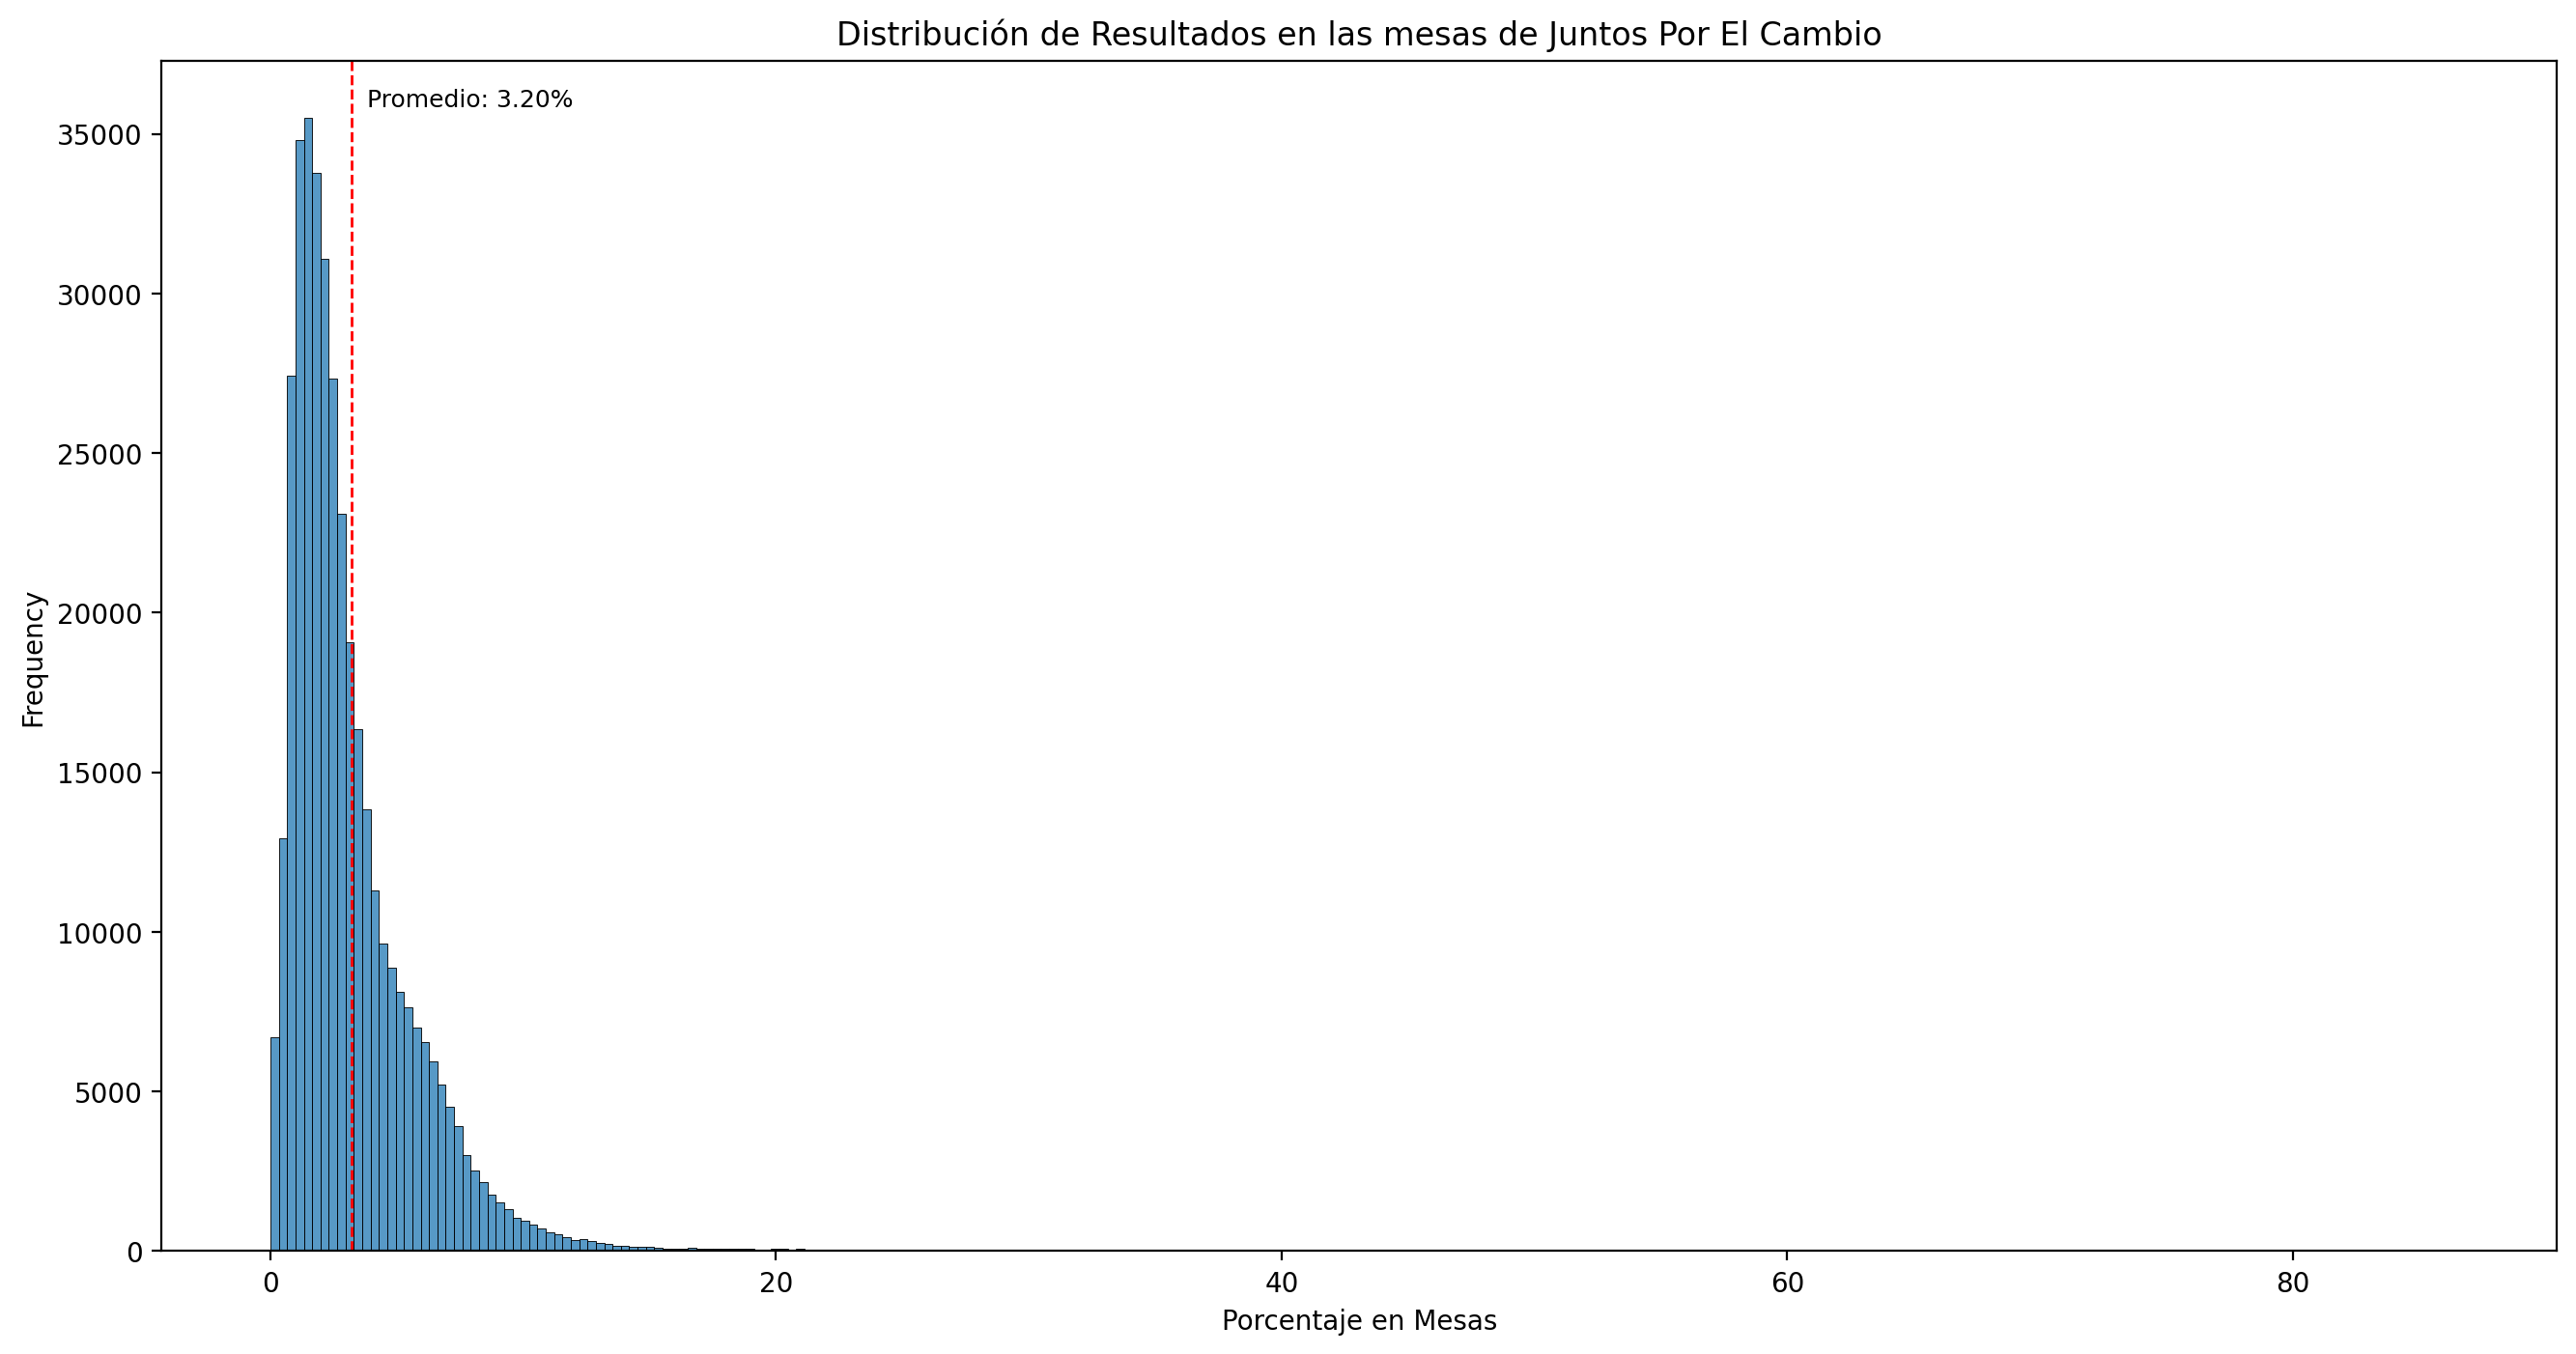

In [19]:
df1_mesas_porcen = df1_mesa[df1_mesa['lista_nombre']=='B- LA FUERZA DEL CAMBIO']
promedio = df1_mesas_porcen['votos_porcentaje'].mean()
mediana = df1_mesas_porcen['votos_porcentaje'].median()

data_range = df1_mesas_porcen['votos_porcentaje'].max() - df1_mesas_porcen['votos_porcentaje'].min()
num_bins = int(np.ceil(data_range / 1))
plt.figure(figsize=(16, 8))
chart = sns.histplot(df1_mesas_porcen, x="votos_porcentaje", bins=num_bins*3)
plt.text(promedio,chart.get_ylim()[1], f'\n  Promedio: {promedio:.2f}%', color='black', fontsize=9, verticalalignment='top')
plt.axvline(promedio, color='red', linestyle='--',linewidth=1)
plt.title('Distribución de Resultados en las mesas de Juntos Por El Cambio')
plt.xlabel('Porcentaje en Mesas')
plt.ylabel('Frequency')
plt.show()
# df1_mesas_porcen['votos_porcentaje'] = round(df1_mesas_porcen['votos_porcentaje'],0)
# data = df1_mesas_porcen['votos_porcentaje'].value_counts()
# result = stats.anderson(data, dist='norm')
# test_statistic = result.statistic
# critical_values = result.critical_values
# p_value = critical_values[4]
# # p_value = result.significance_level
# if p_value < 0.01:
#     print(f"The data does not follow a normal distribution (p-value = {p_value})")
# else:
#     print(f"The data follows a normal distribution (p-value = {p_value})")

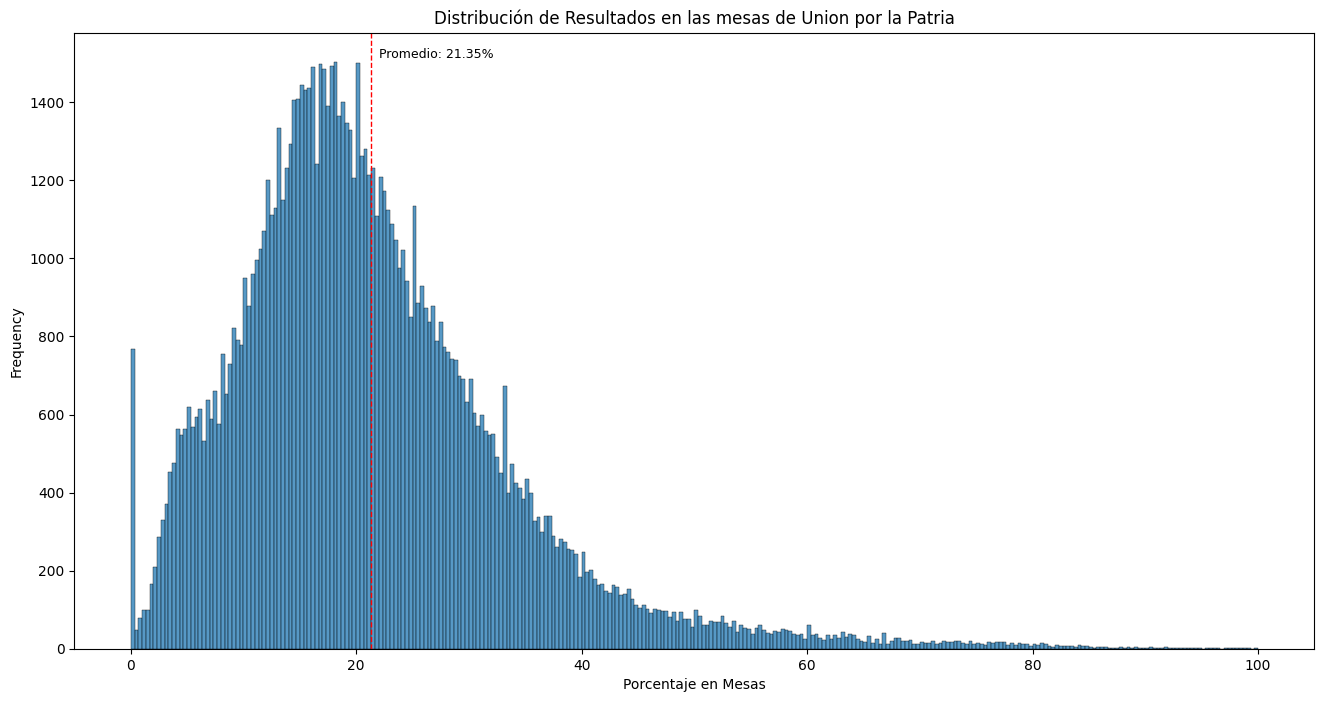

In [95]:
df1_mesas_porcen = df1_mesa[df1_mesa['lista_nombre'] == 'A- CELESTE Y BLANCA']
promedio = df1_mesas_porcen['votos_porcentaje'].mean()
mediana = df1_mesas_porcen['votos_porcentaje'].median()

data_range = df1_mesas_porcen['votos_porcentaje'].max() - df1_mesas_porcen['votos_porcentaje'].min()
num_bins = int(np.ceil(data_range / 1))
plt.figure(figsize=(16, 8))
chart = sns.histplot(df1_mesas_porcen, x="votos_porcentaje", bins=num_bins*3)
plt.text(promedio,chart.get_ylim()[1], f'\n  Promedio: {promedio:.2f}%', color='black', fontsize=9, verticalalignment='top')
plt.axvline(promedio, color='red', linestyle='--',linewidth=1)
plt.title('Distribución de Resultados en las mesas de Union por la Patria')
plt.xlabel('Porcentaje en Mesas')
plt.ylabel('Frequency')
plt.show()

# df1_mesas_porcen['votos_porcentaje'] = round(df1_mesas_porcen['votos_porcentaje'],0)
# data = df1_mesas_porcen['votos_porcentaje'].value_counts()
# result = stats.anderson(data, dist='norm')
# test_statistic = result.statistic
# critical_values = result.critical_values
# p_value = critical_values[4]
# # p_value = result.significance_level
# if p_value < 0.01:
#     print(f"The data does not follow a normal distribution (p-value = {p_value})")
# else:
#     print(f"The data follows a normal distribution (p-value = {p_value})")

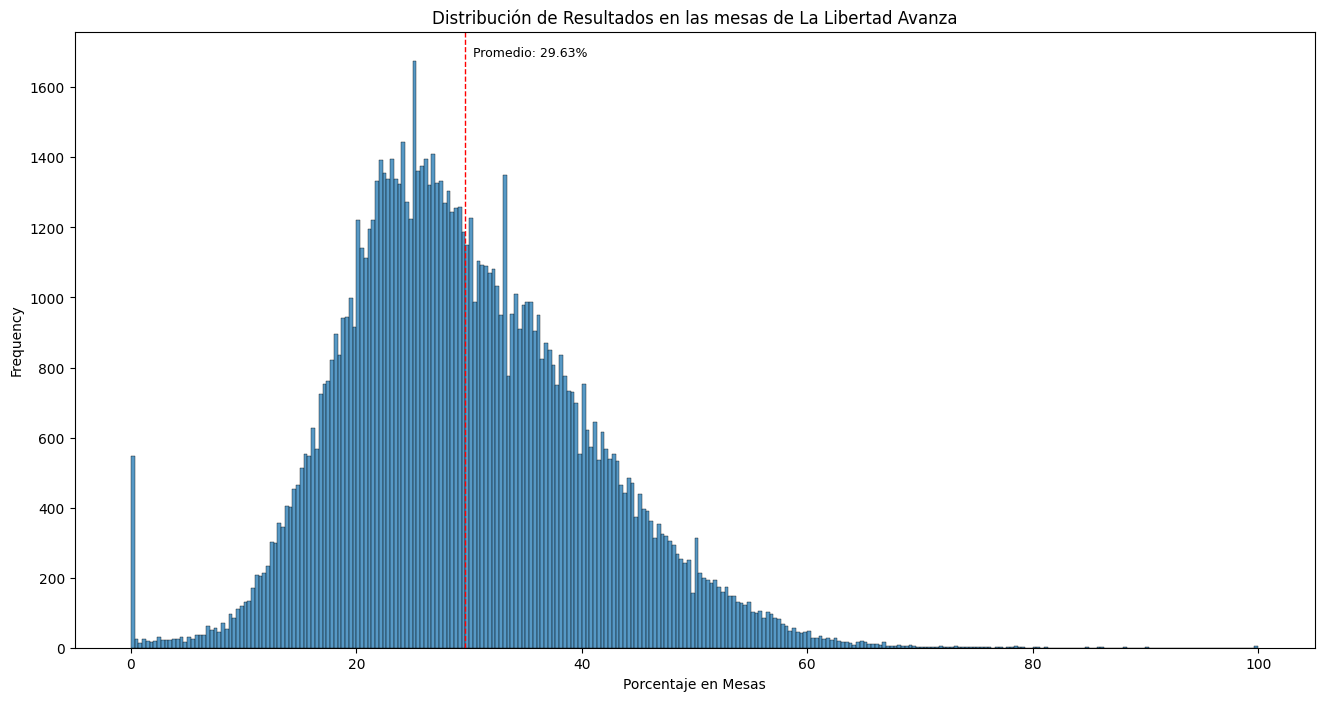

In [96]:
df1_mesas_porcen = df1_mesa[df1_mesa['agrupacion_nombre']=='LA LIBERTAD AVANZA']
promedio = df1_mesas_porcen['votos_porcentaje'].mean()
mediana = df1_mesas_porcen['votos_porcentaje'].median()

data_range = df1_mesas_porcen['votos_porcentaje'].max() - df1_mesas_porcen['votos_porcentaje'].min()
num_bins = int(np.ceil(data_range / 1))
plt.figure(figsize=(16, 8))
chart = sns.histplot(df1_mesas_porcen, x="votos_porcentaje", bins=num_bins*3)
plt.text(promedio,chart.get_ylim()[1], f'\n  Promedio: {promedio:.2f}%', color='black', fontsize=9, verticalalignment='top')
plt.axvline(promedio, color='red', linestyle='--',linewidth=1)

plt.title('Distribución de Resultados en las mesas de La Libertad Avanza')
plt.xlabel('Porcentaje en Mesas')
plt.ylabel('Frequency')
plt.show()
# df1_mesas_porcen['votos_porcentaje'] = round(df1_mesas_porcen['votos_porcentaje'],0)
# data = df1_mesas_porcen['votos_porcentaje'].value_counts()
# result = stats.anderson(data, dist='norm')
# test_statistic = result.statistic
# critical_values = result.critical_values
# p_value = critical_values[4]
# # p_value = result.significance_level
# if p_value < 0.01:
#     print(f"The data does not follow a normal distribution (p-value = {p_value})")
# else:
#     print(f"The data follows a normal distribution (p-value = {p_value})")